# Natural Cubic Spline Interpolation

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

Given $N+1$ data points $(t_0,y_0), \dots , (t_N,y_N)$ we want to construct the **natural cubic spline**: a piecewise cubic polynomial function $p(t)$ such that:
* $p(t)$ is defined by $N$ cubic polynomials $p_1(t),p_2(t),\dots,p_N(t)$
* Each $p_k(t)$ is defined on the subinterval $[t_{k-1},t_k]$
* $p(t)$ is continuous
* $p(t)$ is smooth (ie. $p'(t)$ and $p''(t)$ are continuous)
* $p(t_k)=y_k$ for all $k=0,\dots,N$

## Example 1

Consider $(0,0),(1,1),(2,0)$. Construct the linear system for the cubic spline.

In [3]:
A = np.array([[1,1,1,0,0,0],
              [3,2,1,0,0,-1],
              [6,2,0,0,-2,0],
              [0,0,0,1,1,1],
              [0,2,0,0,0,0],
              [0,0,0,6,2,0]])

In [4]:
A

array([[ 1,  1,  1,  0,  0,  0],
       [ 3,  2,  1,  0,  0, -1],
       [ 6,  2,  0,  0, -2,  0],
       [ 0,  0,  0,  1,  1,  1],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  6,  2,  0]])

In [5]:
y = np.array([1,0,0,-1,0,0]).reshape(6,1)

In [7]:
y

array([[ 1],
       [ 0],
       [ 0],
       [-1],
       [ 0],
       [ 0]])

In [8]:
c = la.solve(A,y)

In [9]:
c

array([[-0.5],
       [ 0. ],
       [ 1.5],
       [ 0.5],
       [-1.5],
       [ 0. ]])

In [10]:
np.linalg.cond(A)

14.530258040767455

Now let's use [`scipy.interpolate.CubicSpline`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) to compute the natural cubic spline and compare our results.

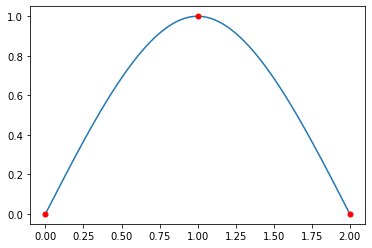

In [11]:
t1 = [0,1,2]
y1 = [0,1,0]
cs1 = CubicSpline(t1,y1,bc_type='natural')
T1 = np.linspace(0,2,200)
Y1 = cs1(T1)
plt.plot(T1,Y1,t1,y1,'r.',markersize=10)
plt.show()

Verify the coefficient matrix:

In [12]:
cs1.c

array([[-0.5,  0.5],
       [ 0. , -1.5],
       [ 1.5,  0. ],
       [ 0. ,  1. ]])

## Example 2

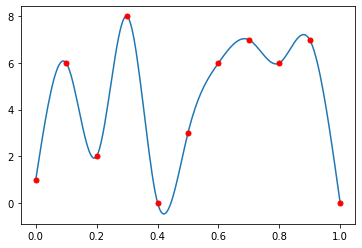

In [16]:
N = 10
t2 = np.linspace(0,1,N+1)
y2 = np.random.randint(0,10,N+1)
cs2 = CubicSpline(t2,y2,bc_type='natural')
T2 = np.linspace(0,1,200)
Y2 = cs2(T2)
plt.plot(T2,Y2,t2,y2,'r.',markersize=10)
plt.show()

## Example 3

Let's interpolate the points $\sin(\pi t_k)$ for $t_k = k/N$ for $N=15$ with added noise.

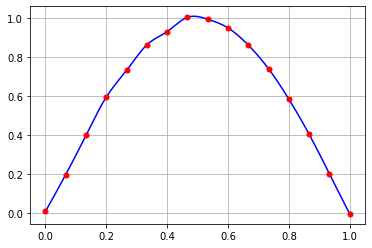

In [17]:
N = 15
t3 = np.linspace(0,1,N+1)
noise = 0.005*np.random.randn(t3.size)
y3 = np.sin(np.pi*t3) + noise
cs3 = CubicSpline(t3,y3)
T3 = np.linspace(0,1,200)
Y3 = cs3(T3)
plt.plot(T3,Y3,'b-',t3,y3,'r.',markersize=10)
plt.grid(True)
plt.show()

The cubic spline is not sensitive to small changes in the $y$ values.